In [2]:
!pip install gym

     |████████████████████████████████| 1.6 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 7.6 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656448 sha256=f227e97e500b04727abaf1fbe5d1bd8cc625e1ff7c6a7b5db083939ffe5421a6
  Stored in directory: /home/cxpercival/.cache/pip/wheels/d8/e7/68/a3f0f1b5831c9321d7523f6fd4e0d3f83f2705a1cbd5daaa79
Successfully built gym
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1


**STEP #1: Import required libs**

In [19]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys
    
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting
  
matplotlib.style.use('ggplot')

**STEP #2: Create gym environment**

In [8]:
env = WindyGridworldEnv()

**STEP #3: Make the epsilon-greedy policy**

In [10]:
def create_epsilon_greedy_policy(Q, epsilon, actions_num):
    
    def policy_function(state):
        
        action_probalilities = np.ones(actions_num, dtype=float) * epsilon / actions_num
        best_action = np.argmax(Q[state])
        action_probalilities[best_action] += (1.0 - epsilon)
        
        return action_probalilities
    
    return policy_function

**STEP #4: Build Q-Learning Model**

In [16]:
def q_learning(env, episodes_num, discount_factor=1.0, learning_factor=.6, epsilon=.1):
    
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    stats = plotting.EpisodeStats(episode_lengths=np.zeros(episodes_num),
                                  episode_rewards=np.zeros(episodes_num))
    
    policy = create_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for ith_episode in range(episodes_num):
        # reset the environment and pick the first action
        state = env.reset()
        for i in itertools.count():
            # get probabilities of all actions from current state
            action_probabilities = policy(state)
            # choose action according to the probability distribution
            action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)
            
            # update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = i
            
            # Temporal Difference (TD) update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += learning_factor * td_delta
            
            if done:
                break
            
            state = next_state
        
    return Q, stats

**STEP #5: Train the model**

In [17]:
Q, stats = q_learning(env, 1000)

**STEP #6: Plot important statistics**

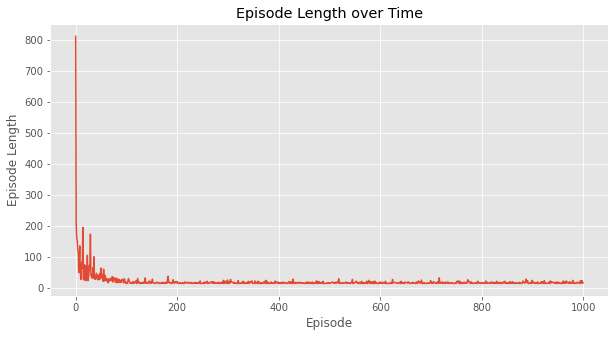

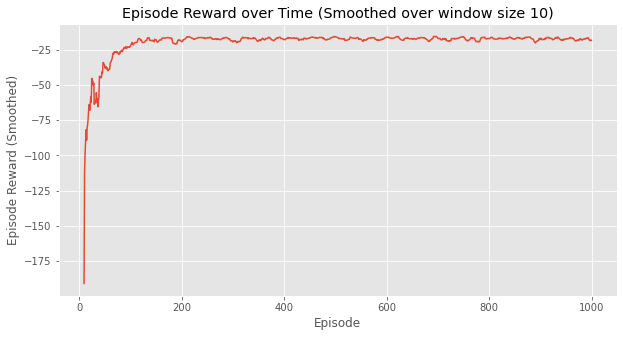

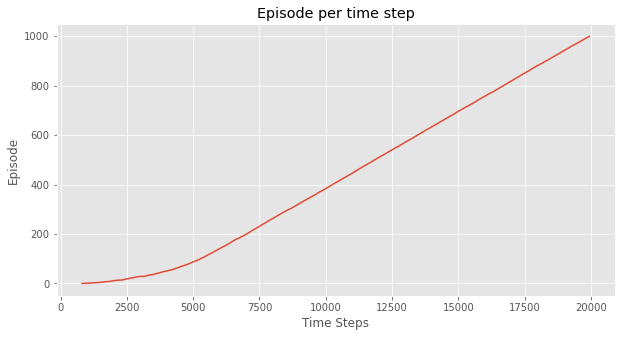

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [18]:
plotting.plot_episode_stats(stats)